In [2]:
# set the path
path = r"doc/summer paper/"
fig_path = path + "Figures/"
table_path = path + "Tables/"
from functions import *

$$ z_k = \frac{G}{B} = \left(\frac{\alpha}{1-\alpha}\frac{r^B}{r^G}\right)^{\gamma_s}$$
$$ z_l = \frac{L}{K} =  \frac{1-\beta}{\beta} \frac{1}{\alpha}(\alpha_s + (1-\alpha_s) z_k^{-\frac{\gamma_s-1}{\gamma_s}})^{\frac{1}{\gamma_s-1}} \frac{r^G}{W} $$


$$
\frac{\tilde{A}}{r^B + \tau_E\tilde{A}}\left[
            -\frac{\gamma\alpha}{\circ} 
            - (\dfrac{w}{\frac{r}{z_l} + w})\frac{1-\alpha}{\triangle}
            \right]
$$

In [3]:

def gen_df(params,τ_E):
    params_0 = params.copy()
    params_0['τ_E'] = τ_E 
    params_1 = params_0.copy()
    res_1 = ratios_gen(params_1)
    res_1 = res_1.__add__((res_1[6] *params_1['A_tilde'], ))
    params_2 = params_0.copy()
    params_2['A_hat'] = params_2['A_hat'] * 0.8
    params_2['A_tilde'] = params_2['A_tilde'] * 1.2
    res_2 = ratios_gen(params_2)
    res_2 = res_2.__add__((res_2[6] *params_2['A_tilde'], ))
    # put the results into a dataframe
    df = pd.DataFrame([res_1,res_2],columns=['z_k','z_l','l','y','p','g','b','e'])
    df['income'] = (df.y * df.p).round(2)
    df['intensity'] = df.e / df.y / df.p * 1e3
    
    # add sum row
    df.loc['sum'] = np.nan
    df.loc['sum','l']= df.l.sum()
    df.loc['sum','g']= df.g.sum()
    df.loc['sum','b']= df.b.sum()
    df.loc['sum','e']= df.e.sum()
    df.loc['sum','income']= df.income.sum()
    p_s = 0
    y_s = 0
    for i in [res_1,res_2]:
        p_s += i[4] ** (1-params_0['σ'])
        y_s += i[3] ** ((params_0['σ']-1)/(params_0['σ']))
    p_s = p_s ** (1/(1-params_0['σ']))
    y_s = y_s ** (params_0['σ']/(params_0['σ']-1))
    df.loc['sum','p'] = p_s
    # df.p = df.p/p_s
    df.loc['sum','y'] = y_s
    return df

In [5]:
parameters = {
    'β': 0.6,
    'γ':2.58,
    'α': 0.45,
    'A_hat': 1,
    'A_tilde': 0.002,
    'μ': 0,
    'θ': 1,
    'η': np.inf,
    'σ': 5,
    'r_b': 0.05,
    'green_premium': 0,
    'w': .500, # MSEK
    'τ_E': 0,# per ton
    'n': int(1e3)}

# CO2 Emission is 13800 Kton
# Labor 500 TSEK

tax_1 = 0
tax_2 = 100/1
tax_3 = 1300/1
df = pd.concat([gen_df(parameters,tax_1),gen_df(parameters,tax_2),gen_df(parameters,tax_3)],keys=['τ_E = {}'.format(tax_1),'τ_E = {}'.format(tax_2),'τ_E = {}'.format(tax_3)],axis=0)
print(1- df.loc[df.index == ('τ_E = {}'.format(tax_3), 'sum')].e.iloc[0]/ df.loc[df.index == ('τ_E = 0', 'sum')].e.iloc[0] , 1- df.loc[df.index == ('τ_E = {}'.format(tax_3), 'sum')].y.iloc[0]/ df.loc[df.index == ('τ_E = 0', 'sum')].y.iloc[0] )
df

0.11878874539373707 0.05769334020119177


z_k       z_l             l             y         p  \
τ_E = 0      0    0.595871  0.131642  13942.953833  4.130390e+06  0.462867   
             1    0.595871  0.131642   5711.033890  1.353446e+06  0.578584   
             sum       NaN       NaN  19653.987723  6.343967e+06  0.424798   
τ_E = 100.0  0    0.602040  0.131971  13859.595782  4.111856e+06  0.463561   
             1    0.603279  0.132037   5670.112137  1.346166e+06  0.579625   
             sum       NaN       NaN  19529.707919  6.313856e+06  0.425472   
τ_E = 1300.0 0    0.679130  0.135826  12934.333860  3.904209e+06  0.471638   
             1    0.696588  0.136638   5222.662762  1.265680e+06  0.591660   
             sum       NaN       NaN  18156.996622  5.977962e+06  0.433295   

                            g             b          e      income  intensity  
τ_E = 0      0    6852.881808  11500.605199  23.001210  1911821.56   0.012031  
             1    2806.940389   4710.647890  11.305555   783082.11   0.014437  
             sum  9659.822196  16211.253088  34.306765  2694903.67        NaN  
τ_E = 100.0  0    6859.391284  11393.575946  22.787152  1906098.08   0.011955  
             1    2810.138200   4658.109527  11.179463   780271.53   0.014328  
             sum  9669.529484  16051.685473  33.966615  2686369.61        NaN  
τ_E = 1300.0 0    6934.842562  10211.356783  20.422714  1841373.95   0.011091  
             1    2846.951873   4086.997564   9.808794   748851.88   0.013098  
             sum  9781.794435  14298.354347  30.231508  2590225.83        NaN

In [ ]:
τ_E = 100
z_k,z_l = optimal_ratios(parameters,τ_E)
res1 = function_price(parameters['A_tilde'],parameters['A_hat'],parameters['α'],parameters['γ'],z_l,z_k,parameters['β'],parameters['w'],parameters['green_premium'],parameters['r_b'],parameters['σ'],τ_E,detail=True)
res1 = res1 + (z_k,z_l)
z_k,z_l = optimal_ratios(parameters,0)
res2 = function_price(parameters['A_tilde'],parameters['A_hat'],parameters['α'],parameters['γ'],z_l,z_k,parameters['β'],parameters['w'],parameters['green_premium'],parameters['r_b'],parameters['σ'],0,detail=True)
res2 = res2 + (z_k,z_l)
df = pd.DataFrame([res2,res1],columns=['C_G','C_B','c_L','C_E','P','z_k','z_l'],index=['τ_E = 0','τ_E = {}'.format(τ_E)])

df


,C_G,C_B,c_L,C_E,P,z_k,z_l
τ_E = 0,0.019583,0.176247,0.130553,0.00000,4.079785,0.111111,0.106667
τ_E = 100,0.020604,0.172775,0.133066,0.00622,4.158309,0.119255,0.110110


z_k:  0.1111111111111111 
z_l:  0.10666666666666669 
price:  4.079784843170737 
labor:  2.310100814724803
intensity: (KG/SEK)  0.6344881388099127
production: (MSEK) 0.060318171456707995
emission: (ton) 3.827116434398386e-08
--------------------------------------------------
Intensity: (KG/SEK) 0.8102412939506161
Emission: (MTon)  0.07531376745152116
Production: (BSek)  1.7699635085094836
Emission/Production: (KG/SEK)  0.042551028362694414
Emission cost:  0.0
Green Capital:  222520.26924543033
Brown Capital:  33219672.251065873


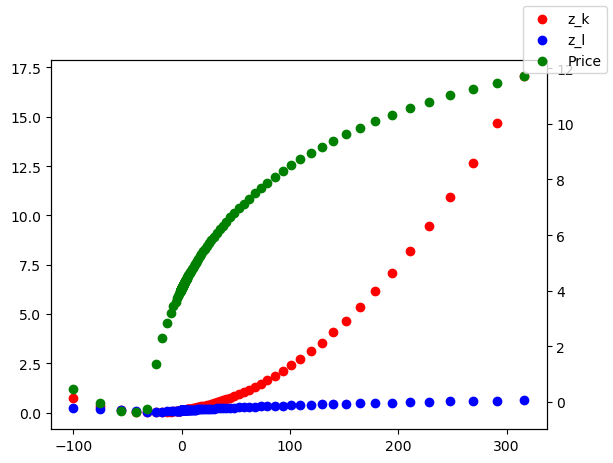

In [4]:
def price_test(input_0,τ_E):
    z_k = function_z_k(input_0['α'],input_0['γ'],input_0['r_b'], input_0['green_premium'],τ_E,input_0['A_tilde'])
    z_l = function_z_l(z_k,input_0['β'],input_0['α'],input_0['γ'],input_0['w'],input_0['green_premium'],input_0['r_b'])
    p = function_price(input_0['A_tilde'],input_0['A_hat'],input_0['α'],input_0['γ'],z_l,z_k,input_0['β'],input_0['w'],input_0['green_premium'],input_0['r_b'],input_0['σ'],τ_E)
    return p,z_k,z_l
# print()
params_0 = parameters.copy()
params_0['σ'] = 5
# params_0['γ'] = 1100
x_test = []
y_test = []
k_test = []
l_test = []
import matplotlib.pyplot as plt

for i in np.append(np.logspace(-1,2.5,100), -np.logspace(-1,2,25)):
    p,z_k,z_l = price_test(params_0,i*1e2)
    if ~np.isnan(p):
        x_test.append(i)
        y_test.append(p)
        k_test.append(z_k)
        l_test.append(z_l)
# 
fig, ax1 = plt.subplots()


ax1.scatter( x_test,k_test,color='r',label=False)
ax1.scatter( x_test,l_test,color='b',label=False)
ax2 = ax1.twinx()
ax2.scatter( x_test,y_test,color='g',label=False)
fig.legend(['z_k','z_l','Price'])
plt.show()


In [6]:
def function_coef(A_tilde,α,γ,z_l,z_k,green_premium,r_b,τ_E,w,β):
    epsilon_change = A_tilde/(r_b + τ_E/1000 * A_tilde) * (
    -γ*α/(function_green_ratio(α,γ,z_k) ** (-((γ-1)/γ))) - (1-α)/(function_green_ratio(α,γ,z_k) ** (-((γ-1)/γ)))/(function_r(α,γ,z_k,green_premium,r_b) /w/z_l) 
    )
    c_change = 1/(τ_E/1000) + epsilon_change
    return epsilon_change/c_change 
parameters_0 = parameters.copy()
parameters_0['τ_E'] = 1000
parameters_0['γ'] = 2
z_k,z_l = optimal_ratios(parameters_0,parameters_0['τ_E'])
function_coef(parameters_0['A_tilde'],parameters_0['α'],parameters_0['γ'],z_l,z_k,parameters_0['green_premium'],parameters_0['r_b'],parameters_0['τ_E'],parameters_0['w'],parameters_0['β'])

-0.19012233408528623

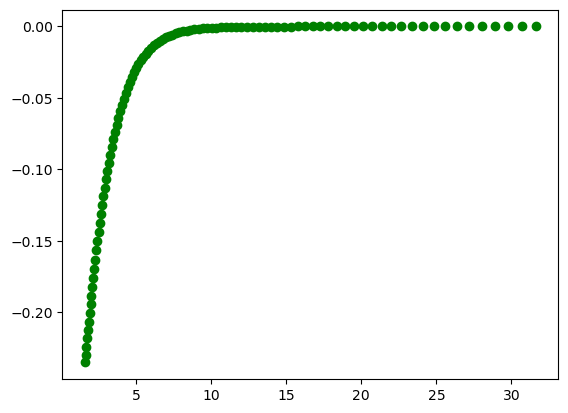

In [7]:
τ_E = 1000
params_0 = parameters.copy()
params_0['τ_E'] = τ_E
x_test = []
y_test = []
k_test = []
l_test = []
import matplotlib.pyplot as plt

for i in np.logspace(0.2,1.5,100):
    params_0['γ'] = i
    z_k,z_l = optimal_ratios(params_0,τ_E)
    coef = function_coef(params_0['A_tilde'],params_0['α'],params_0['γ'],z_l,z_k,params_0['green_premium'],params_0['r_b'],params_0['τ_E'],params_0['w'],params_0['β'])
    if ~np.isnan(coef):
        x_test.append(i)
        y_test.append(coef)
# 
fig, ax1 = plt.subplots()

ax1.scatter( x_test,y_test,color='g',label=False)
# fig.legend(['z_k','z_l','Price'])
plt.show()

In [167]:
def test_func(params_0):
    z_k = function_z_k(params_0['α'],params_0['γ'],params_0['r_b'], params_0['green_premium'],params_0['τ_E'],params_0['A_tilde'])
    z_l = function_z_l(z_k,params_0['β'],params_0['α'],params_0['γ'],params_0['w'],params_0['green_premium'],params_0['r_b'])
    l = optimal_labor(params_0['A_tilde'],params_0['A_hat'],params_0['α'],params_0['γ'],z_l,z_k,params_0['β'],params_0['w'],params_0['green_premium'],params_0['r_b'],params_0['σ'],params_0['τ_E'])
    y = production_function(params_0['A_hat'],params_0['β'],z_l,l)
    p = function_price(params_0['A_tilde'],params_0['A_hat'],params_0['α'],params_0['γ'],z_l,z_k,params_0['β'],params_0['w'],params_0['green_premium'],params_0['r_b'],params_0['σ'],params_0['τ_E'])
    C_G,C_B,c_L,C_E = function_price_detail(params_0['A_tilde'],params_0['A_hat'],params_0['α'],params_0['γ'],z_l,z_k,params_0['β'],params_0['w'],params_0['green_premium'],params_0['r_b'],params_0['σ'],params_0['τ_E'])
    return z_k,z_l,l,y*1e3,p,C_G,C_B,c_L,C_E

params_0 = params.copy()
params_0['σ'] = 5
params_0['w'] = params_0['w'] / 1e3
params_0['τ_E'] = 20 * 1e2
z_k,z_l,l,y,p,C_G,C_B,c_L,C_E = test_func(params_0)
print("C_G:", C_G)
print("C_B:", C_B)
print("c_L:", c_L)
print("C_E:", C_E)
print("P: ",params_0['σ']/(params_0['σ']-1) * (C_G + C_B + c_L + C_E) / params_0['A_hat'])





C_G: 0.03250359679419391
C_B: 0.01863539549533783
c_L: 1.1337234725274548
C_E: 0.013417484756643235
P:  14.978499369670372
